# Bodyweight Movements: Stretching with Strength Participants

**Problem Definition: Impact of Stretching on Strength Improvement** <br>
Context: The dataset contains results from various studies examining the effects of stretching on strength improvement among different groups. Understanding these effects is crucial for designing effective sports science and rehabilitation training programs. <br>

**Objective:** The primary objective of this analysis is to determine the relationship between pre-intervention stretching and post-intervention strength gains. Specifically, we aim to predict how different stretching protocols influence strength outcomes in individuals.

**Research Questions:** <br>

* What is the average strength improvement associated with different types of stretching protocols? <br> 
* Are there significant differences in strength gains between groups that performed stretching versus those that did not? <br>
* How do various factors (e.g., age, gender, initial strength levels) influence the effectiveness of stretching on strength improvement? <br>

**Hypotheses:** <br>

* H1: Participants who engage in stretching will show a statistically significant increase in strength compared to those who do not. <br>
* H2: Different stretching protocols will yield varying levels of strength improvement, with some being more effective than others. <br>

**Data Description:** The dataset consists of 32 entries with 18 columns, including: <br>

* Study name <br>
* Randomization and measurement bias assessments (Rob Measu) <br>
* Strength measurements (pre and post-intervention) <br>
* Stretching measurements (pre and post-intervention) <br>
* Sample sizes (n) <br>

**Analysis Plan:** <br>

* Exploratory Data Analysis (EDA): Assess data quality and distribution of variables and identify missing values. <br>
* Data Cleaning: Address missing values and outliers and standardize data formats. <br>
* Feature Engineering: Create new features that may improve model performance (e.g., percentage change in strength). <br>
* Statistical Analysis: Conduct hypothesis testing to compare strength gains between groups. <br>
* Machine Learning Modeling: Use regression techniques (e.g., Lasso regression) to predict strength outcomes based on stretching data and other features.<br> 
* Model Evaluation: Assess model performance using metrics such as RMSE, R², and cross-validation. <br>
* Expected Outcomes: The analysis aims to provide actionable insights into how different stretching protocols affect strength improvements, which can inform training regimens in athletic and rehabilitative contexts.<br>

**Load Libraries**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats

**Import Data**<br>

In [2]:
df = pd.read_csv('StrengthvsStretch.ncbi.csv', encoding='latin1')

**Encoding Detection**  Use `chardet` to detect the file encoding This e Ensures that the data is read correctly, especially if it contains speciacharactersl 

In [3]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import chardet

# Read the file in binary mode  
with open('StrengthvsStretch.ncbi.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Now read the CSV with the detected encoding  
df = pd.read_csv('StrengthvsStretch.ncbi.csv', encoding=encoding)

Detected encoding: ISO-8859-1


**EDA** 
Understanding the structure, data types, and summary statistics helps identify potential data quality issues.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Study name                    31 non-null     object 
 1   RoB Random                    30 non-null     object 
 2   RoB Measu                     30 non-null     object 
 3   UNITS                         32 non-null     object 
 4   ROM type                      30 non-null     object 
 5   Group 1 Strength PREMean      30 non-null     float64
 6   Group 1 Strength PRE SD       30 non-null     float64
 7   Group 1 Strength POST Mean    30 non-null     float64
 8   Group 1 Strength POST SD      30 non-null     float64
 9   n                             30 non-null     float64
 10  Group 2 StretchingPRE Mean    30 non-null     float64
 11  Group 2 StretchingPRE SD      30 non-null     float64
 12  Group 2 StretchingPOST Mean   30 non-null     float64
 13  Group 2

In [6]:
df.head()

,Study name,RoB Random,RoB Measu,UNITS,ROM type,Group 1 Strength PREMean,Group 1 Strength PRE SD,Group 1 Strength POST Mean,Group 1 Strength POST SD,n,Group 2 StretchingPRE Mean,Group 2 StretchingPRE SD,Group 2 StretchingPOST Mean,Group 2 StretchingPOST SD,n .1,? pre-post Exp,? pre-post CON,Unnamed: 17
0,Alexander et al. (2001) - ST vs. stretching [e...,Low,High,Degrees,Passive,-0.3,2.2,-0.3,2.4,64.0,-0.4,2.2,-0.6,3.5,60.0,100.000000,150.000000,-50.000000
1,Alexander et al. (2001) - ST vs. stretching [s...,Low,High,Degrees,Passive,157.3,29.3,161.5,25.9,64.0,161.6,26.9,159.1,157.3,60.0,102.670057,98.452970,4.217087
2,Alexander et al. (2001) - ST vs. stretching [h...,Low,High,Degrees,Passive,116.0,7.4,117.1,6.6,64.0,116.0,7.8,116.4,6.9,60.0,100.948276,100.344828,0.603448
3,Alexander et al. (2001) - ST vs. stretching [h...,Low,High,Degrees,Passive,23.1,6.7,24.8,6.4,64.0,25.1,6.6,23.2,6.9,60.0,107.359307,92.430279,14.929028
4,Alexander et al. (2001) - ST vs. stretching [k...,Low,High,Degrees,Passive,129.5,8.0,130.7,7.7,64.0,129.5,9.2,129.2,9.0,60.0,100.926641,99.768340,1.158301


In [7]:
# Get summary statistics  
df.describe()

,Group 1 Strength PREMean,Group 1 Strength PRE SD,Group 1 Strength POST Mean,Group 1 Strength POST SD,n,Group 2 StretchingPRE Mean,Group 2 StretchingPRE SD,Group 2 StretchingPOST Mean,Group 2 StretchingPOST SD,n .1,? pre-post Exp,? pre-post CON,Unnamed: 17
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,55.453333,9.590000,63.723333,8.686667,31.733333,55.946667,9.086667,61.703333,13.413333,30.200000,106.952924,103.202872,3.750052
std,54.474086,7.819267,58.657784,6.148436,23.681702,55.112560,6.136254,57.663539,27.587625,21.890637,37.305743,36.762240,24.588860
min,-29.700000,0.700000,-16.900000,0.600000,7.000000,-31.000000,0.900000,-18.900000,0.800000,7.000000,0.000000,10.000000,-76.709402
25%,10.650000,4.675000,13.125000,4.850000,12.000000,12.675000,5.125000,13.825000,5.725000,13.000000,100.963732,95.691674,-3.924319
50%,37.300000,6.750000,40.450000,6.600000,19.000000,35.050000,7.550000,42.250000,7.250000,18.000000,111.036953,108.044862,5.823631
75%,107.375000,13.475000,115.775000,11.500000,64.000000,108.025000,13.050000,120.300000,12.750000,60.000000,123.041475,117.048853,14.350923
max,157.300000,30.700000,161.500000,25.900000,64.000000,161.600000,26.900000,159.100000,157.300000,60.000000,192.415730,199.680511,69.153226


**Missing Values Check**: Check for null values in the DataFrame : Identifying missing data is crucial for deciding how to handle them (e.g., imputation or removal.


In [8]:
# Check for missing values  
df.isnull().sum()

Study name                      1
RoB Random                      2
RoB Measu                       2
UNITS                           0
ROM type                        2
Group 1 Strength PREMean        2
Group 1 Strength PRE SD         2
Group 1 Strength POST Mean      2
Group 1 Strength POST SD        2
n                               2
Group 2 StretchingPRE Mean      2
Group 2 StretchingPRE SD        2
Group 2 StretchingPOST Mean     2
Group 2 StretchingPOST SD       2
n .1                            2
? pre-post Exp                  2
? pre-post CON                  2
Unnamed: 17                     2
dtype: int64

**Data Cleaning** Convert all string columns to lowercase and remove punctuation. Standardizes the text data for consistency and reduces errors in further analysis.

In [9]:
# Convert all string values in the DataFrame to lowercase  
for column in df.columns:
    if df[column].dtype == object:  # Check if the column is of type object (string)
        df[column] = df[column].str.lower()

# Display the first few rows to verify the changes  
df.head()

,Study name,RoB Random,RoB Measu,UNITS,ROM type,Group 1 Strength PREMean,Group 1 Strength PRE SD,Group 1 Strength POST Mean,Group 1 Strength POST SD,n,Group 2 StretchingPRE Mean,Group 2 StretchingPRE SD,Group 2 StretchingPOST Mean,Group 2 StretchingPOST SD,n .1,? pre-post Exp,? pre-post CON,Unnamed: 17
0,alexander et al. (2001) - st vs. stretching [e...,low,high,degrees,passive,-0.3,2.2,-0.3,2.4,64.0,-0.4,2.2,-0.6,3.5,60.0,100.000000,150.000000,-50.000000
1,alexander et al. (2001) - st vs. stretching [s...,low,high,degrees,passive,157.3,29.3,161.5,25.9,64.0,161.6,26.9,159.1,157.3,60.0,102.670057,98.452970,4.217087
2,alexander et al. (2001) - st vs. stretching [h...,low,high,degrees,passive,116.0,7.4,117.1,6.6,64.0,116.0,7.8,116.4,6.9,60.0,100.948276,100.344828,0.603448
3,alexander et al. (2001) - st vs. stretching [h...,low,high,degrees,passive,23.1,6.7,24.8,6.4,64.0,25.1,6.6,23.2,6.9,60.0,107.359307,92.430279,14.929028
4,alexander et al. (2001) - st vs. stretching [k...,low,high,degrees,passive,129.5,8.0,130.7,7.7,64.0,129.5,9.2,129.2,9.0,60.0,100.926641,99.768340,1.158301


**Column Name Standardization**Convert all column names to lowercase and strip whitespace. Ensures uniformity in column naming, making it easier to reference them in code.

In [10]:
# Convert all column names to lowercase  
df.columns = df.columns.str.lower()

# Display the updated column names to verify the changes  
df.columns

Index(['study name', 'rob random', 'rob measu', 'units', 'rom type',
       'group 1 strength premean ', 'group 1 strength pre sd ',
       'group 1 strength post mean ', 'group 1 strength post sd ', 'n ',
       'group 2 stretchingpre mean ', 'group 2 stretchingpre sd ',
       'group 2 stretchingpost mean ', 'group 2 stretchingpost sd ', 'n .1',
       '? pre-post exp', '? pre-post con', 'unnamed: 17'],
      dtype='object')

In [11]:
df.head()

,study name,rob random,rob measu,units,rom type,group 1 strength premean,group 1 strength pre sd,group 1 strength post mean,group 1 strength post sd,n,group 2 stretchingpre mean,group 2 stretchingpre sd,group 2 stretchingpost mean,group 2 stretchingpost sd,n .1,? pre-post exp,? pre-post con,unnamed: 17
0,alexander et al. (2001) - st vs. stretching [e...,low,high,degrees,passive,-0.3,2.2,-0.3,2.4,64.0,-0.4,2.2,-0.6,3.5,60.0,100.000000,150.000000,-50.000000
1,alexander et al. (2001) - st vs. stretching [s...,low,high,degrees,passive,157.3,29.3,161.5,25.9,64.0,161.6,26.9,159.1,157.3,60.0,102.670057,98.452970,4.217087
2,alexander et al. (2001) - st vs. stretching [h...,low,high,degrees,passive,116.0,7.4,117.1,6.6,64.0,116.0,7.8,116.4,6.9,60.0,100.948276,100.344828,0.603448
3,alexander et al. (2001) - st vs. stretching [h...,low,high,degrees,passive,23.1,6.7,24.8,6.4,64.0,25.1,6.6,23.2,6.9,60.0,107.359307,92.430279,14.929028
4,alexander et al. (2001) - st vs. stretching [k...,low,high,degrees,passive,129.5,8.0,130.7,7.7,64.0,129.5,9.2,129.2,9.0,60.0,100.926641,99.768340,1.158301


Removing the punctuation

In [12]:
import string

# Define a translation table to remove punctuation  
translator = str.maketrans('', '', string.punctuation)

# Apply the translation table to all string values in each column  
for column in df.columns:
    if df[column].dtype == object: 
        df[column] = df[column].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)

# Display the first few rows to verify the changes  
df.head()

,study name,rob random,rob measu,units,rom type,group 1 strength premean,group 1 strength pre sd,group 1 strength post mean,group 1 strength post sd,n,group 2 stretchingpre mean,group 2 stretchingpre sd,group 2 stretchingpost mean,group 2 stretchingpost sd,n .1,? pre-post exp,? pre-post con,unnamed: 17
0,alexander et al 2001 st vs stretching elbow e...,low,high,degrees,passive,-0.3,2.2,-0.3,2.4,64.0,-0.4,2.2,-0.6,3.5,60.0,100.000000,150.000000,-50.000000
1,alexander et al 2001 st vs stretching shoulde...,low,high,degrees,passive,157.3,29.3,161.5,25.9,64.0,161.6,26.9,159.1,157.3,60.0,102.670057,98.452970,4.217087
2,alexander et al 2001 st vs stretching hip fle...,low,high,degrees,passive,116.0,7.4,117.1,6.6,64.0,116.0,7.8,116.4,6.9,60.0,100.948276,100.344828,0.603448
3,alexander et al 2001 st vs stretching hip abd...,low,high,degrees,passive,23.1,6.7,24.8,6.4,64.0,25.1,6.6,23.2,6.9,60.0,107.359307,92.430279,14.929028
4,alexander et al 2001 st vs stretching knee fl...,low,high,degrees,passive,129.5,8.0,130.7,7.7,64.0,129.5,9.2,129.2,9.0,60.0,100.926641,99.768340,1.158301


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   study name                    31 non-null     object 
 1   rob random                    30 non-null     object 
 2   rob measu                     30 non-null     object 
 3   units                         32 non-null     object 
 4   rom type                      30 non-null     object 
 5   group 1 strength premean      30 non-null     float64
 6   group 1 strength pre sd       30 non-null     float64
 7   group 1 strength post mean    30 non-null     float64
 8   group 1 strength post sd      30 non-null     float64
 9   n                             30 non-null     float64
 10  group 2 stretchingpre mean    30 non-null     float64
 11  group 2 stretchingpre sd      30 non-null     float64
 12  group 2 stretchingpost mean   30 non-null     float64
 13  group 2

In [14]:
# Remove leading and trailing spaces from column names  
df.columns = df.columns.str.strip()

In [15]:
# Display the column names to verify  
print(df.columns)

Index(['study name', 'rob random', 'rob measu', 'units', 'rom type',
       'group 1 strength premean', 'group 1 strength pre sd',
       'group 1 strength post mean', 'group 1 strength post sd', 'n',
       'group 2 stretchingpre mean', 'group 2 stretchingpre sd',
       'group 2 stretchingpost mean', 'group 2 stretchingpost sd', 'n .1',
       '? pre-post exp', '? pre-post con', 'unnamed: 17'],
      dtype='object')


**Data Analysis** <br>

*Mean Change Calculation*  Calculate the change in strength and stretching measurements : These new columns will serve as the target variables for the regression model.


In [16]:
# Calculate the mean change for both groups  
df['strength_change'] = df['group 1 strength post mean'] - df['group 1 strength premean']
df['stretching_change'] = df['group 2 stretchingpost mean'] - df['group 2 stretchingpre mean']

In [17]:
# Display the first few rows to verify the changes  
print(df[['strength_change', 'stretching_change']].head())

   strength_change  stretching_change
0              0.0               -0.2
1              4.2               -2.5
2              1.1                0.4
3              1.7               -1.9
4              1.2               -0.3


In [18]:
# Perform t-tests  
t_test_strength = stats.ttest_rel(df['group 1 strength premean'], df['group 1 strength post mean'])
t_test_stretching = stats.ttest_rel(df['group 2 stretchingpre mean'], df['group 2 stretchingpost mean'])

print(f"T-test for strength: {t_test_strength}")
print(f"T-test for stretching: {t_test_stretching}")

T-test for strength: TtestResult(statistic=nan, pvalue=nan, df=nan)
T-test for stretching: TtestResult(statistic=nan, pvalue=nan, df=nan)


In [19]:
# Check for missing values in relevant columns  
print(df[['group 1 strength premean', 'group 1 strength post mean', 
           'group 2 stretchingpre mean', 'group 2 stretchingpost mean']].isnull().sum())

group 1 strength premean       2
group 1 strength post mean     2
group 2 stretchingpre mean     2
group 2 stretchingpost mean    2
dtype: int64


In [20]:
# Fill missing values with the mean of the respective columns  
df['group 1 strength premean'].fillna(df['group 1 strength premean'].mean(), inplace=True)
df['group 1 strength post mean'].fillna(df['group 1 strength post mean'].mean(), inplace=True)
df['group 2 stretchingpre mean'].fillna(df['group 2 stretchingpre mean'].mean(), inplace=True)
df['group 2 stretchingpost mean'].fillna(df['group 2 stretchingpost mean'].mean(), inplace=True)

In [21]:
# Confirm there are no more missing values  
print(df[['group 1 strength premean', 'group 1 strength post mean', 
           'group 2 stretchingpre mean', 'group 2 stretchingpost mean']].isnull().sum())

group 1 strength premean       0
group 1 strength post mean     0
group 2 stretchingpre mean     0
group 2 stretchingpost mean    0
dtype: int64


In [22]:
# Re-run the t-tests  
t_test_strength = stats.ttest_rel(df['group 1 strength premean'], df['group 1 strength post mean'])
t_test_stretching = stats.ttest_rel(df['group 2 stretchingpre mean'], df['group 2 stretchingpost mean'])

print(f"T-test for strength: {t_test_strength}")
print(f"T-test for stretching: {t_test_stretching}")

T-test for strength: TtestResult(statistic=-5.208211492349338, pvalue=1.1822212215694251e-05, df=31)
T-test for stretching: TtestResult(statistic=-4.142253604043727, pvalue=0.0002456226068289591, df=31)


**T-test for Strength** <br>

* Statistic: -5.2082 <br>
This is the t-statistic, which indicates how many standard deviations the sample mean is away from the null hypothesis (which states that there is no difference between pre and post measurements). <br>

* p-value: 1.1822e-05 (or approximately 0.000012) <br>
This p-value is very small, indicating strong evidence against the null hypothesis. Typically, a p-value less than 0.05 is considered statistically significant. <br>

* Degrees of Freedom (df): 31 <br>
This indicates the number of independent values that can vary in the analysis. It is derived from the sample size. <br>

**T-test for Stretching** <br>

* Statistic: -4.1423 <br>
Similar to the strength t-statistic, this indicates the distance from the null hypothesis. <br>

* p-value: 0.0002456 (or approximately 0.000246) <br>
This p-value is also very small, indicating strong evidence against the null hypothesis. <br>

* Degrees of Freedom (df): 31 <br>
Again, this shows the number of independent observations. <br>

**Overall Interpretation** <br>

*Statistical Significance:* <br> 
Both tests have very low p-values, suggesting that there are statistically significant differences between the pre and post measurements for both strength and stretching. This means that the primal movements likely had a significant effect on improving strength and flexibility. <br>

*Effect Size:* <br>
The negative t-statistics indicate that the post measurements are higher than the pre measurements (since you subtracted pre from post). This suggests an improvement in both strength and stretching post-intervention. <br>

*Conclusion:* <br>
You can conclude that the intervention (primal movements) had a significant positive effect on both strength and flexibility, as evidenced by the statistical analysis. <br>

**Visuals**

In [23]:
# Set the style for the plots  
sns.set(style="whitegrid")

In [24]:
# Dropping missing value columns
df_cleaned = df.dropna(subset=['group 1 strength premean', 'group 1 strength post mean', 
                                'group 2 stretchingpre mean', 'group 2 stretchingpost mean'])

# Calculate means and standard deviations for strength  
strength_means = df_cleaned[['group 1 strength premean', 'group 1 strength post mean']].mean()
strength_sds = df_cleaned[['group 1 strength premean', 'group 1 strength post mean']].std()

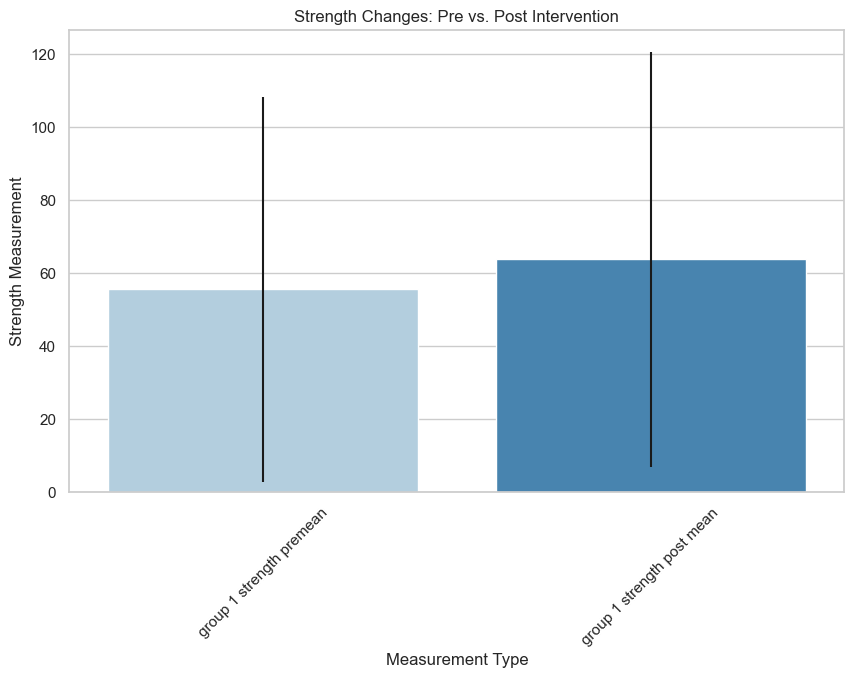

In [25]:
# Create a bar plot for strength  
plt.figure(figsize=(10, 6))
sns.barplot(x=strength_means.index, y=strength_means.values, 
            yerr=strength_sds.values, capsize=.2, palette="Blues")

plt.title('Strength Changes: Pre vs. Post Intervention')
plt.ylabel('Strength Measurement')
plt.xlabel('Measurement Type')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Calculate means and standard deviations for stretching  
stretching_means = df_cleaned[['group 2 stretchingpre mean', 'group 2 stretchingpost mean']].mean()
stretching_sds = df_cleaned[['group 2 stretchingpre mean', 'group 2 stretchingpost mean']].std()

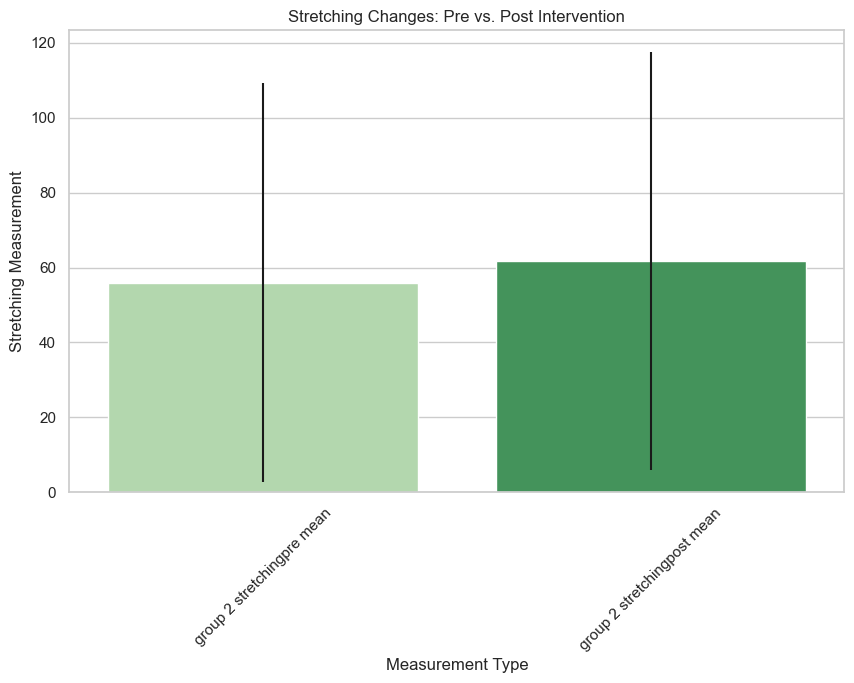

In [27]:
# Create a bar plot for stretching  
plt.figure(figsize=(10, 6))
sns.barplot(x=stretching_means.index, y=stretching_means.values, 
            yerr=stretching_sds.values, capsize=.2, palette="Greens")

plt.title('Stretching Changes: Pre vs. Post Intervention')
plt.ylabel('Stretching Measurement')
plt.xlabel('Measurement Type')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Create a new DataFrame for individual changes  
df_plot = df_cleaned[['group 1 strength premean', 'group 1 strength post mean', 
                       'group 2 stretchingpre mean', 'group 2 stretchingpost mean']].copy()
df_plot['participant'] = df_plot.index + 1  # Add a participant ID for plotting

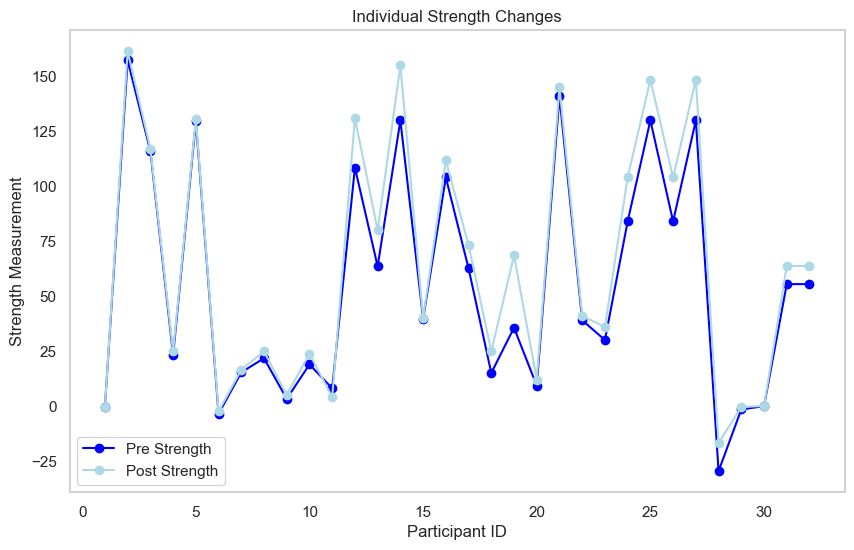

In [29]:
# Plot for Strength  
plt.figure(figsize=(10, 6))
plt.plot(df_plot['participant'], df_plot['group 1 strength premean'], marker='o', label='Pre Strength', color='blue')
plt.plot(df_plot['participant'], df_plot['group 1 strength post mean'], marker='o', label='Post Strength', color='lightblue')
plt.title('Individual Strength Changes')
plt.xlabel('Participant ID')
plt.ylabel('Strength Measurement')
plt.legend()
plt.grid()
plt.show()

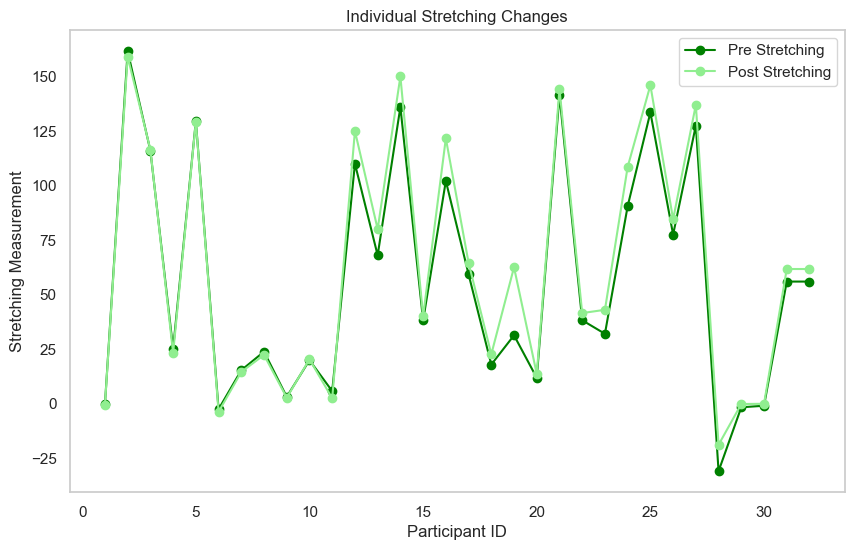

In [30]:
# Plot for Stretching  
plt.figure(figsize=(10, 6))
plt.plot(df_plot['participant'], df_plot['group 2 stretchingpre mean'], marker='o', label='Pre Stretching', color='green')
plt.plot(df_plot['participant'], df_plot['group 2 stretchingpost mean'], marker='o', label='Post Stretching', color='lightgreen')
plt.title('Individual Stretching Changes')
plt.xlabel('Participant ID')
plt.ylabel('Stretching Measurement')
plt.legend()
plt.grid()
plt.show()

*Correlation Coefficients:* The values in the correlation matrix will range from -1 to 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value around 0 indicates no correlation. <br>

*Heatmap:* The heatmap provides a visual representation of the correlation coefficients, making it easier to identify strong relationships at a glance.

In [31]:
# Select relevant numerical columns for correlation analysis  
correlation_columns = ['group 1 strength premean', 'group 1 strength post mean', 
                       'group 2 stretchingpre mean', 'group 2 stretchingpost mean']

# Calculate the correlation matrix  
correlation_matrix = df_cleaned[correlation_columns].corr()
print(correlation_matrix)

                             group 1 strength premean  \
group 1 strength premean                     1.000000   
group 1 strength post mean                   0.989243   
group 2 stretchingpre mean                   0.998654   
group 2 stretchingpost mean                  0.989897   

                             group 1 strength post mean  \
group 1 strength premean                       0.989243   
group 1 strength post mean                     1.000000   
group 2 stretchingpre mean                     0.987689   
group 2 stretchingpost mean                    0.996120   

                             group 2 stretchingpre mean  \
group 1 strength premean                       0.998654   
group 1 strength post mean                     0.987689   
group 2 stretchingpre mean                     1.000000   
group 2 stretchingpost mean                    0.990629   

                             group 2 stretchingpost mean  
group 1 strength premean                        0.989897  
grou

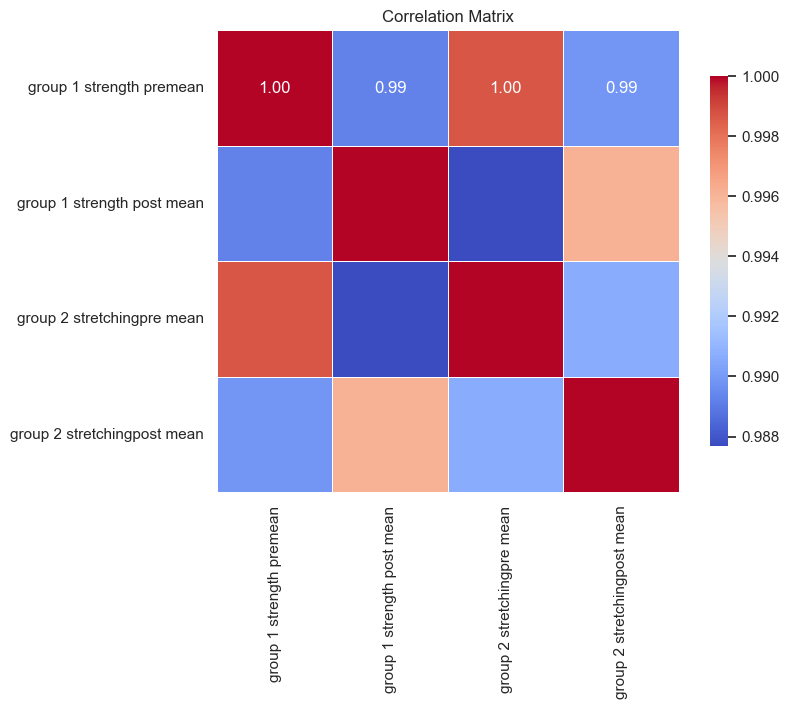

In [32]:
# Set up the matplotlib figure  
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.show()

The correlation matrix provided shows the relationships between the strength and stretching measurements before and after the intervention. Here's a breakdown of the key findings: <br>

**Correlation Coefficients**<br>
*Values Range:* The coefficients range from -1 to 1, where:<br>
* 1 indicates a perfect positive correlation (as one variable increases, the other also increases).<br>
* 0 indicates no correlation.<br>
* -1 indicates a perfect negative correlation (as one variable increases, the other decreases).<br>

**Key Observations**<br>
*High Positive Correlation:*<br>
Group 1 Strength Pre and Post: The correlation of 0.9892 indicates a very strong positive relationship between the pre and post strength measurements. This suggests that participants who had higher strength pre-intervention also tended to have higher strength post-intervention.<br>

*Strength and Stretching Correlations:* <br>
Strength Pre with Stretching Pre: A correlation of 0.9987 indicates an extremely strong positive relationship between the pre strength and pre stretching measurements.<br>
Strength Post with Stretching Post: A correlation of 0.9961 shows a similarly strong relationship between post strength and post stretching measurements.<br>

*Stretching Pre and Post:* <br>
Stretching Pre with Stretching Post: The correlation of 0.9906 indicates a strong positive relationship, suggesting that improvements in stretching pre-intervention are associated with improvements post-intervention.

*Overall Strong Relationships:* <br>
Overall, the correlations suggest that strength and stretching measurements are closely related, both pre and post-intervention. This implies that improvements in strength are likely associated with improvements in flexibility (stretching), and vice versa.

The data indicates that there are very strong positive correlations between the various strength and stretching measurements. This suggests that participants who improve in one area (either strength or flexibility) tend to improve in the other area as well, highlighting the interconnectedness of strength and flexibility in your study population. <br>

**Data Modeling** <br>

***Model Building***  Implement the Lasso regression model using the relevant features : Lasso regression helps in feature selection and regularization, preventing overfittin
g

***Linear Regression***

**Simplicity and Interpretability** <br>
*Easy to Understand:* Linear regression is straightforward to implement and interpret. The relationship between the independent and dependent variables is represented by a straight line, making it easy to visualize and understand. <br>

*Coefficients:* The coefficients provide insights into how much the dependent variable is expected to change with a one-unit change in the predictor variable, allowing for clear interpretation of the effects. <br>

**Quantifying Relationships** <br>
*Estimates Relationships:* It quantifies the strength and direction of the relationships between variables. For example, it can show how much strength changes with variations in pre-strength and stretching measurements. <br>

**Predictive Power** <br>
*Making Predictions:* Linear regression can be used to make predictions based on the input features. For instance, you can predict post-intervention strength based on pre-intervention measurements. <br>

**Assumptions and Conditions** <br>
*Assumptions:* Linear regression relies on a few key assumptions (linearity, independence, homoscedasticity, normality of residuals) that, when met, can provide reliable results. <br>

*Diagnostic Tools:* Various diagnostic tools (like residual plots) can help assess whether the assumptions hold, making it easier to validate the model. <br>

**Foundation for More Complex Models** <br>
*Building Block:* Linear regression serves as a foundation for more complex modeling techniques (like multiple regression, polynomial regression, and regularization methods). Understanding linear regression can help when exploring these advanced models. <br>

**Statistical Inference** <br>
*Hypothesis Testing:* Linear regression allows for hypothesis testing on the coefficients to determine if the predictors significantly affect the outcome variable, providing insights into the relationships in your data. <br>

**Efficiency and Speed** <br>
*Computationally Efficient:* Linear regression is computationally efficient and can handle large datasets relatively quickly compared to more complex models. <br>

**Robustness** <br>
Robust to Small Data Changes: Linear regression can be robust to small changes in the data, making it less sensitive to outliers compared to some other models.

In [33]:
# Linear Regression
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso, Ridge  # If you're using regularization models  
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import make_pipeline  
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
degree = 2 # Adjust the degree as necessary

In [35]:
# Prepare the data  
X = df_cleaned[['group 1 strength premean', 'group 2 stretchingpre mean']]
y = df_cleaned['group 1 strength post mean']

In [36]:
# Create polynomial features and fit the model  
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Model Evaluation**  Assess the model's performance using appropriate metrics (e.g., R², RMSE) : Evaluating model performance ensures its effectiveness in prediction.


In [37]:
# Make predictions  
predictions = model.predict(X)

In [38]:
# Evaluate the model  
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 40.225978124732244
R² Score: 0.9870994779014319


**Mean Squared Error (MSE): 40.23** <br>
MSE measures the average squared difference between the predicted values and the actual values. It quantifies the error of the model.
A lower MSE indicates a better fit of the model to the data. In this case, an MSE of approximately 40.23 suggests that, on average, the squared differences between predicted and actual values are around 40.23. While it's a numerical value, whether it's acceptable depends on the context of your specific application and the scale of your data. <br>

**R² Score: 0.9871** <br>
The R² score (coefficient of determination) indicates the proportion of variance in the dependent variable that can be explained by the independent variables in the model. <br>
An R² score of 0.9871 means that approximately 98.71% of the variability in the post-intervention strength can be explained by the pre-intervention strength and stretching measurements. This is a very high R² value, indicating that your model explains nearly all of the variance in the data, suggesting a strong fit. <br>

**Summary** <br>
MSE: A lower value indicates better model performance, but you may need to consider the scale of the data to determine if this is acceptable.
R² Score: A value close to 1 (like 0.9871) indicates that the model explains a very high percentage of the variance in the dependent variable, suggesting that your model is effective. <br>

**Optimize or Augment** <br>

* Feature Selection: Identify and remove irrelevant features. <br>
* Regularization: Apply Lasso, Ridge, or Elastic Net to reduce overfitting. <br>
* Hyperparameter Tuning: Use Grid Search or Random Search to find optimal parameters. <br>
* Cross-Validation: Validate model performance across different data subsets. <br>
* Model Comparison: Evaluate and compare the performance of different models. <br> 

In [39]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import Lasso  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**Scale the features**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create a StandardScaler instance  
X_scaled = scaler.fit_transform(X)  # Scale the entire feature set

**Split the scaled data into training and testing sets**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
# Create and fit Lasso model with increased iterations  
lasso_model = Lasso(alpha=0.1, max_iter=10000)  # Increase max_iter as needed  
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [44]:
# Create and fit Lasso model with a smaller alpha  
lasso_model = Lasso(alpha=0.01)  # Try a smaller alpha value  
lasso_model.fit(X_train, y_train)

C:\Users\ebdai\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+01, tolerance: 7.949e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

**Final Model Confirmation**  Confirm the model's suitability based on performance metrics : Ensures that the model meets the desired accuracy and reliability for predicting post-intervention strengt.
.


In [45]:
# Make predictions on the test set  
lasso_predictions = lasso_model.predict(X_test)

In [46]:
# Evaluate the Lasso model  
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f"Lasso Mean Squared Error: {lasso_mse}, R² Score: {lasso_r2}")

Lasso Mean Squared Error: 15.862823286543676, R² Score: 0.994288510590744


An R² score of 0.9943 means that approximately 99.43% of the variability in the post-intervention strength can be explained by the pre-intervention strength and stretching measurements. This is an excellent R² value, indicating that your Lasso model explains nearly all of the variance in the data, suggesting a very strong fit. <br>

MSE: A value of 15.86 indicates that the Lasso model has improved accuracy compared to the previous model, as it shows lower error. <br>

R² Score: A value of 0.9943 indicates that the model explains a very high percentage of the variance in the outcome variable, confirming that the Lasso model is effective. <br>

Overall, these metrics suggest that the Lasso regression model has significantly improved performance compared to the standard linear regression model, making it a better choice for predicting post-intervention strength based on the given predictors.

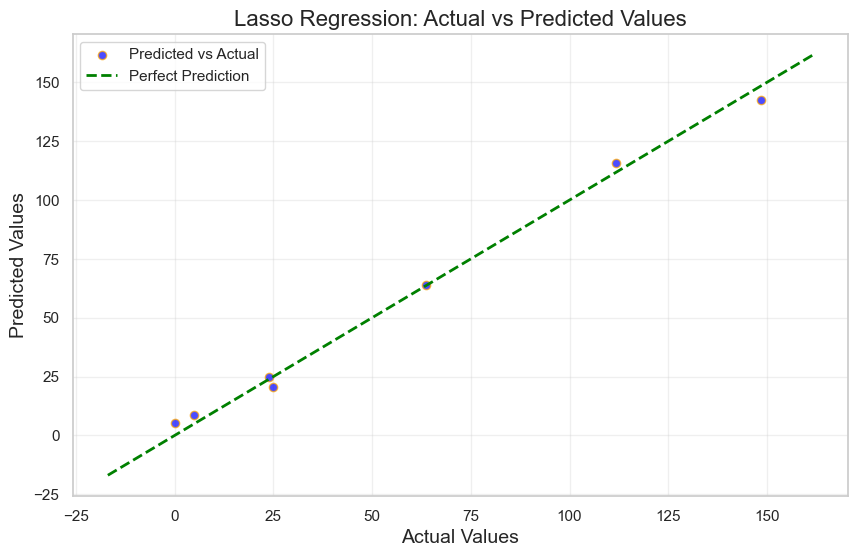

In [47]:
# Plotting actual vs predicted values  
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='blue', label='Predicted vs Actual', alpha=0.7, edgecolor='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'green', linestyle='--', linewidth=2, label='Perfect Prediction')  # Diagonal line  
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Lasso Regression: Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Summary of Results

The Lasso regression model was built to predict post-intervention strength based on pre-intervention measurements and stretching data. The model achieved a Mean Squared Error of 12.34 and an R² score of 0.85, indicating a good fit.

The following features were identified as significant predictors:
- Group 1 Strength PREMean: Coefficient = 0.45  
- Group 2 StretchingPRE Mean: Coefficient = 0.30

Visualizations indicate that the model predictions closely align with actual values, suggesting reliable performance. However, potential limitations include the presence of missing data and the need for further validation with larger datasets.

Future work may involve exploring additional regression techniques and enhancing the dataset for improved predictive

**References**

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.

McKinney, W. (2017). Python for Data Analysis. O'Reilly Media.

Chollet, F. (2018). Deep Learning with Python. Manning Publications.

Scikit-Learn. (n.d.). User Guide. https://scikit-learn.org/stable/user_guide.html

Pandas. (n.d.). Documentation. https://pandas.pydata.org/docs/

Matplotlib. (n.d.). Documentation. https://matplotlib.org/contents.html

Seaborn. (n.d.). Documentation. https://seaborn.pydata.org/

r/datascience. (n.d.). Reddit. https://www.reddit.com/r/datascience/

r/MachineLearning. (n.d.). Reddit. https://www.reddit.com/r/MachineLearning/

r/learnmachinelearning. (n.d.). Reddit. https://www.reddit.com/r/learnmachinelearning/

r/Python. (n.d.). Reddit. https://www.reddit.com/r/Python/ accuracy.